# Case 2: Business Analytics

In this case we are a company that would like to develop an internal program that suggests improvements and business strategies to the management team given some data. Our development team needs to choose the most appropiate LLM for this project.

In [37]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

scales = {
    "Reasoning": QuantitativeScale(0, 100, PreferenceDirection.MAX),                # GPQA score (1 - 100)
    "Cost": QuantitativeScale(0, 50, PreferenceDirection.MIN),                      # Cost $ per 1M tokens
    "Context Window": QuantitativeScale(8000, 2000000, PreferenceDirection.MAX),    # Context Window in tokens
    "Multilingual": QuantitativeScale(0, 100, PreferenceDirection.MAX),             # Multilingual accuracy (1 - 100)
    "Speed": QuantitativeScale(2000, 4000000, PreferenceDirection.MAX)              # Speed in TPM
}

alternatives = [
    "GPT-4.1",               
    "GPT o4-mini",             
    "GPT o3",              
    "Claude 3.5 Sonnet",        
    "Claude 3 Opus",      
    "Llama 3.1 405b",       
    "Llama 3.1 70b",       
    "Llama 3.1 8b",              
    "Grok 2",           
    "Grok 3",            
    "Gemini 2.5 Pro",              
    "Gemini 1.5 Pro",               
    "Gemini 1.5 Flash"        
]


performance_data = [  
    # Reasoning, Cost, Context Window, Multilingual, Speed
    [66.3, 10, 1047576, 89.6, 30000],
    [77.6, 5.5, 200000, 80, 100000],
    [82.8, 50, 200000, 91.7, 30000],
    [59.4, 18, 200000, 92, 3052],
    [50.4, 90, 200000, 84.9, 1680],
    [50.7, 3.25, 128000, 91.6, 2215],
    [41.7, 0.84, 128000, 86.9, 2754],
    [30.4, 0.1, 128000, 68.9, 12546],
    [56, 12, 8192, 86.2, 1200],
    [75.4, 18, 131072, 91.2, 4320],
    [84, 17.5, 2000000, 74.4, 1000000],
    [46.2, 12.5, 2000000, 75.3, 4000000],
    [39.5, 0.75, 1000000, 74.1, 4000000]
]


criteria = {
    "Reasoning": 0.5,
    "Cost": 0.05,
    "Context Window": 0.3,
    "Multilingual": 0.05,
    "Speed": 0.1
}

**Criteria Justification:**
- **Reasoning**: The most important criteria because the decisions from the management team are critical for the company.
- **Cost**: Not very important, since the company is willing to pay a lot of money if the application can provide good results.
- **Context Window**: A very important criteria because the model needs to have a lot of context about the company and remember many data.
- **Multilingual**: This is an internal development, so we will just use English since it performs better in general.
- **Speed**: Not a key creiteria. This application will be used internally from time to time, so UX is not relevant.

In [38]:
# Indifference thresholds (q)
q = {
    "Reasoning": 2,  
    "Cost": 2,       
    "Context Window": 200000,          
    "Multilingual": 3,             
    "Speed": 1500                  
}

# Preference thresholds (p)
p = {
    "Reasoning": 5,    
    "Cost": 5,       
    "Context Window": 500000,    
    "Multilingual": 6,              
    "Speed": 10000           
}

# Veto thresholds (v)
v = {
    "Reasoning": 7,
    "Cost": None,
    "Context Window": 750000,
    "Multilingual": None,
    "Speed": None
}

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,1.000000,0.358333,0.500000,1.000000,1.000000,0.950000,0.950000,0.950000,1.00,0.500000,0.100000,0.600000,0.850000
GPT o4-mini,0.650000,1.000000,0.450000,0.950000,0.968333,0.945833,0.905667,0.950000,0.95,0.950000,0.100000,0.600000,0.554167
GPT o3,0.650000,0.850000,1.000000,0.950000,1.000000,0.950000,0.950000,0.950000,0.95,0.950000,0.550000,0.550000,0.550000
Claude 3.5 Sonnet,0.050000,0.350000,0.400000,1.000000,1.000000,0.950000,0.950000,0.855953,0.95,0.500000,0.100000,0.550000,0.550000
Claude 3 Opus,0.021667,0.350000,0.300000,0.400000,1.000000,0.900000,0.950000,0.850000,0.45,0.386588,0.050000,0.550000,0.550000
Llama 3.1 405b,0.100000,0.400000,0.400000,0.500000,1.000000,1.000000,0.993167,0.880833,0.50,0.492882,0.100000,0.600000,0.591667
Llama 3.1 70b,0.100000,0.400000,0.370000,0.465000,0.500000,0.471667,1.000000,0.902447,0.50,0.477557,0.100000,0.183333,0.600000
Llama 3.1 8b,0.050000,0.350000,0.350000,0.450000,0.450000,0.450000,0.450000,1.000000,0.45,0.450000,0.058333,0.050000,0.063333
Grok 2,0.093333,0.350000,0.358333,0.715859,1.000000,0.910000,0.949365,0.850000,1.00,0.447608,0.100000,0.600000,0.550000
Grok 3,0.550000,0.816667,0.400000,1.000000,1.000000,0.950000,0.950000,0.870871,0.95,1.000000,0.100000,0.550000,0.550000


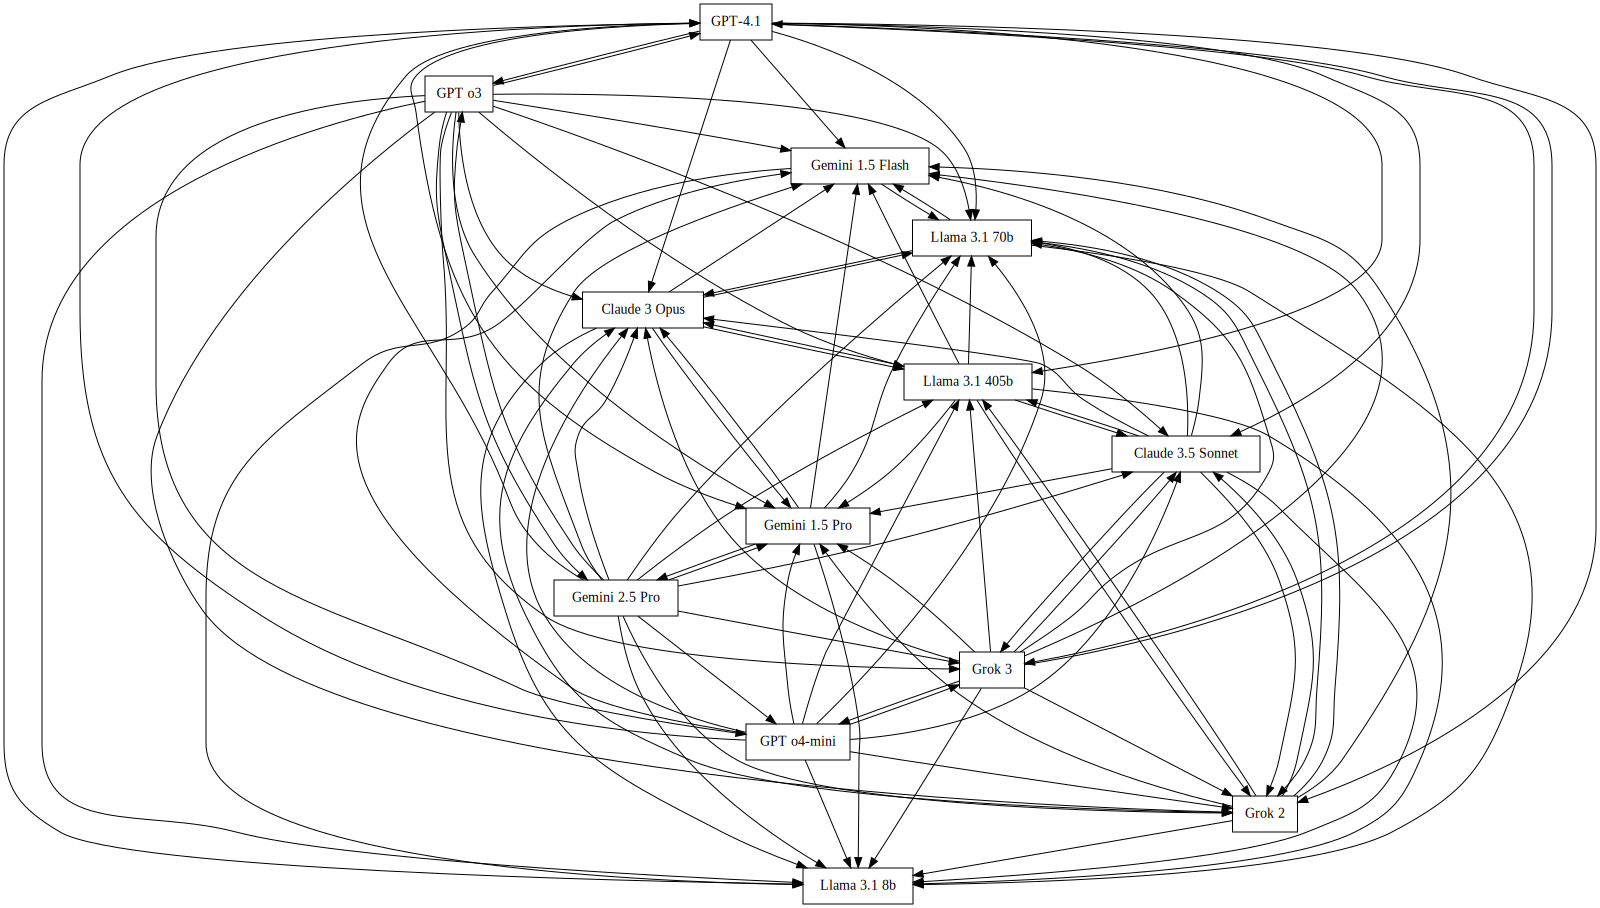

In [39]:
performance_table = PerformanceTable(
    performance_data,
    alternatives=alternatives,
    criteria=criteria,
    scales=scales
)

electre3 = Electre3(
    criteria_weights=criteria,
    preference_thresholds=p,
    indifference_thresholds=q,
    veto_thresholds=v,
    alpha=0.3,
    beta=-0.15
)

concordance = electre3.concordance(performance_table)
display(concordance)

conc_mat_cut = concordance.where(concordance >= 0.5, 0)
AdjacencyMatrix(conc_mat_cut).plot()

In [40]:
discordance = electre3.discordance(performance_table)
display(discordance)

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
GPT o4-mini,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.1 Cost 0.0 Co...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.7 Cost 0.0 Co...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
GPT o3,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Claude 3.5 Sonnet,Reasoning 0.95 Cost 0.00 ...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Claude 3 Opus,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.3 Cost 0.0 Co...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 405b,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.15 Cost 0.00 ...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 70b,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 8b,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...
Grok 2,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Grok 3,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,1.0,0.000000,0.00,1.000000,1.000000,0.950000,0.950000,0.950000,1.00,0.00,0.0,0.00,0.85
GPT o4-mini,0.0,1.000000,0.45,0.950000,0.968333,0.945833,0.905667,0.950000,0.95,0.95,0.0,0.00,0.00
GPT o3,0.0,0.850000,1.00,0.950000,1.000000,0.950000,0.950000,0.950000,0.95,0.95,0.0,0.00,0.00
Claude 3.5 Sonnet,0.0,0.000000,0.00,1.000000,1.000000,0.950000,0.950000,0.855953,0.95,0.00,0.0,0.00,0.00
Claude 3 Opus,0.0,0.000000,0.00,0.000000,1.000000,0.900000,0.950000,0.850000,0.45,0.00,0.0,0.00,0.00
Llama 3.1 405b,0.0,0.000000,0.00,0.000000,1.000000,1.000000,0.993167,0.880833,0.50,0.00,0.0,0.00,0.00
Llama 3.1 70b,0.0,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.902447,0.00,0.00,0.0,0.00,0.00
Llama 3.1 8b,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.00,0.00,0.0,0.00,0.00
Grok 2,0.0,0.000000,0.00,0.715859,1.000000,0.910000,0.949365,0.850000,1.00,0.00,0.0,0.00,0.00
Grok 3,0.0,0.816667,0.00,1.000000,1.000000,0.950000,0.950000,0.870871,0.95,1.00,0.0,0.00,0.00


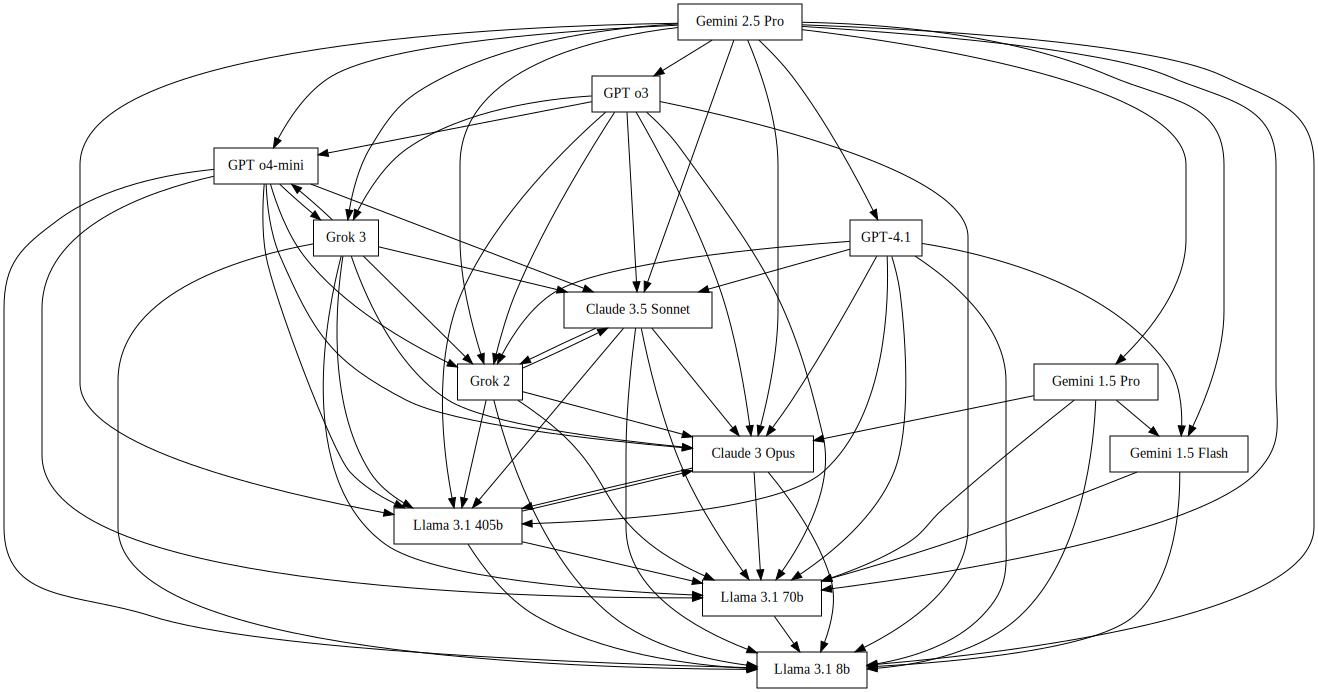

In [41]:
credibility = electre3.construct(performance_table)
display(credibility)

cred_mat_cut = credibility.where(credibility > 0.5, 0)
AdjacencyMatrix(cred_mat_cut).plot()

Ascending Distillation: [['Gemini 2.5 Pro'], ['Gemini 1.5 Pro'], ['GPT-4.1', 'GPT o4-mini', 'GPT o3', 'Gemini 1.5 Flash'], ['Grok 3'], ['Claude 3.5 Sonnet'], ['Grok 2'], ['Llama 3.1 405b'], ['Claude 3 Opus'], ['Llama 3.1 70b'], ['Llama 3.1 8b']]
[['Gemini 2.5 Pro'], ['Gemini 1.5 Pro'], ['GPT-4.1', 'GPT o4-mini', 'GPT o3', 'Gemini 1.5 Flash'], ['Grok 3'], ['Claude 3.5 Sonnet'], ['Grok 2'], ['Llama 3.1 405b'], ['Claude 3 Opus'], ['Llama 3.1 70b'], ['Llama 3.1 8b']]


/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

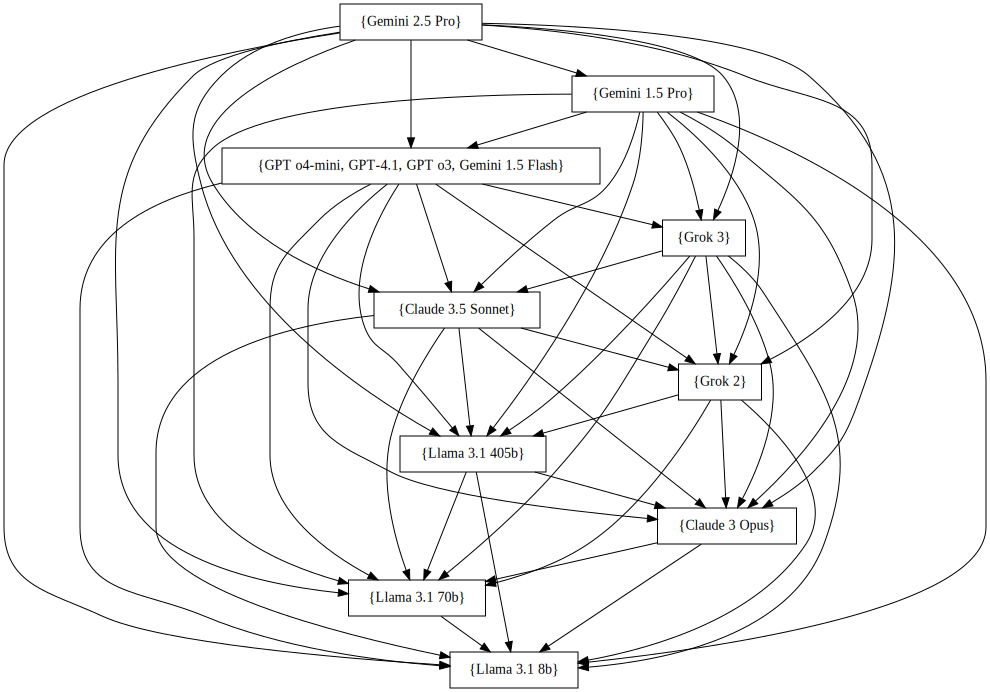

In [42]:
ascending = electre3.distillation(cred_mat_cut, ascending=True)
print("Ascending Distillation:", ascending)
OutrankingMatrix.from_ranked_categories(ascending).graph_condensation.plot()

print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()

[['Gemini 2.5 Pro'], ['GPT o4-mini', 'GPT o3'], ['GPT-4.1', 'Grok 3'], ['Claude 3.5 Sonnet'], ['Grok 2', 'Gemini 1.5 Pro'], ['Llama 3.1 405b'], ['Gemini 1.5 Flash'], ['Claude 3 Opus'], ['Llama 3.1 70b'], ['Llama 3.1 8b']]


/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

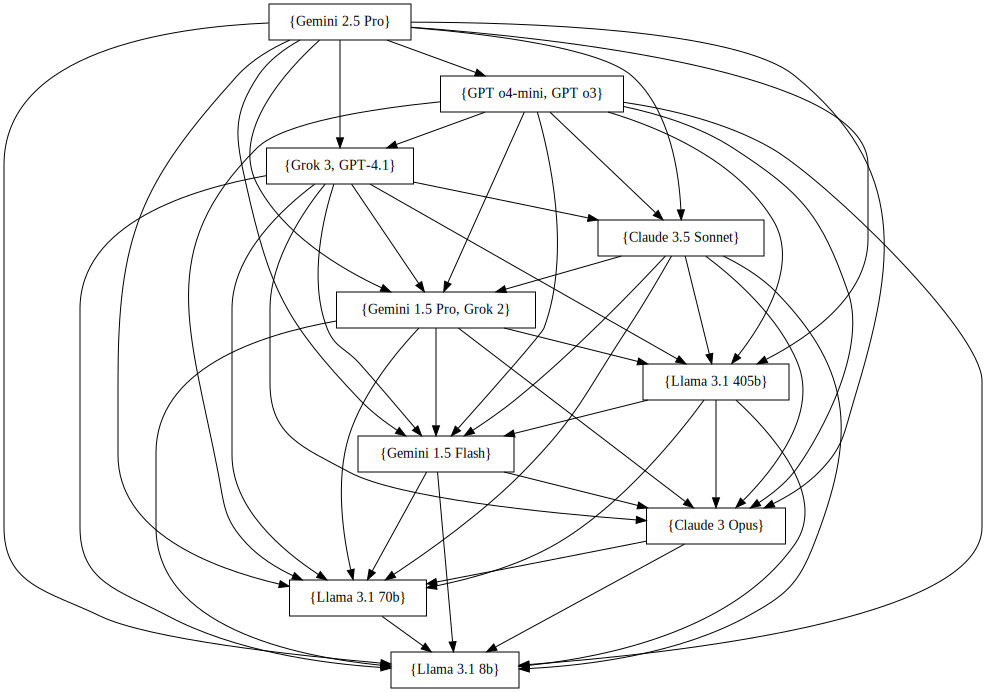

In [43]:
descending = electre3.distillation(cred_mat_cut, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()

/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

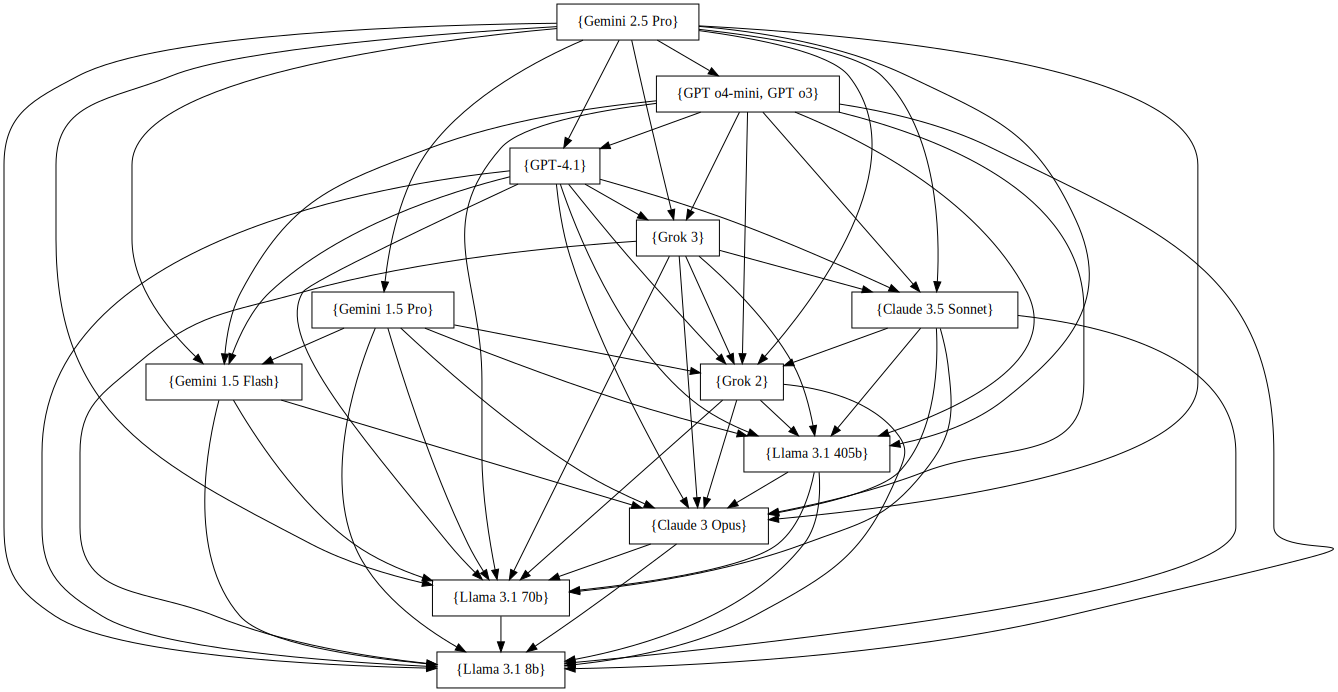

In [44]:
ranking = electre3.exploit(cred_mat_cut)
ranking.graph_condensation.plot()

In [45]:
qualification = electre3.qualification(cred_mat_cut)
print(qualification)

GPT-4.1               5
GPT o4-mini           6
GPT o3                6
Claude 3.5 Sonnet     0
Claude 3 Opus        -7
Llama 3.1 405b       -4
Llama 3.1 70b       -10
Llama 3.1 8b        -10
Grok 2               -3
Grok 3                3
Gemini 2.5 Pro       11
Gemini 1.5 Pro        2
Gemini 1.5 Flash      1
dtype: int64
